In [9]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [10]:
data = pd.read_csv("creditcard_2023.csv", header=0)
data = data.drop(columns=['id'])
print("Data Head: ", data.head())
print("Data Loaded Successfully!")

Data Head:           V1        V2        V3        V4        V5        V6        V7   
0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014  \
1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9       V10  ...       V21       V22       V23       V24   
0 -0.130006  0.727159  0.637735  ... -0.110552  0.217606 -0.134794  0.165959  \
1 -0.133118  0.347452  0.529808  ... -0.194936 -0.605761  0.079469 -0.577395   
2 -0.095576 -0.261297  0.690708  ... -0.005020  0.702906  0.945045 -1.154666   
3 -0.065130 -0.205698  0.575231  ... -0.146927 -0.038212 -0.214048 -1.893131   
4 -0.212660  1.049921  0.968046  ... -0.106984  0.729727 -0.161666  0.312561   

        V25       V26       V27       V28    Amount  Cla

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y = data['Class']
X = data.drop(columns=['Class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

num_neighbors = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
accuracy_dict = {}
for k in num_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(X_train)
    x_test_scaled = scaler.transform(X_test)

    knn.fit(x_train_scaled, y_train)
    knn_pred = knn.predict(x_test_scaled)
    print (f" Accuracy for k-nn when Num_neighbors={k} is {accuracy_score(y_test, knn_pred)}")
    accuracy_dict[k] = accuracy_score(y_test, knn_pred)

print("Accuracy Dict: ", accuracy_dict)


 Accuracy for k-nn when Num_neighbors=2 is 0.9990210388712051
 Accuracy for k-nn when Num_neighbors=4 is 0.9982765594499059
 Accuracy for k-nn when Num_neighbors=6 is 0.9976727690531042
 Accuracy for k-nn when Num_neighbors=8 is 0.9971803574673631
 Accuracy for k-nn when Num_neighbors=10 is 0.9966351874974354
 Accuracy for k-nn when Num_neighbors=12 is 0.9962717408508168
 Accuracy for k-nn when Num_neighbors=14 is 0.995873121948074
 Accuracy for k-nn when Num_neighbors=16 is 0.9955858818563916
 Accuracy for k-nn when Num_neighbors=18 is 0.9952165731670858
 Accuracy for k-nn when Num_neighbors=20 is 0.9948824367339043
Accuracy Dict:  {2: 0.9990210388712051, 4: 0.9982765594499059, 6: 0.9976727690531042, 8: 0.9971803574673631, 10: 0.9966351874974354, 12: 0.9962717408508168, 14: 0.995873121948074, 16: 0.9955858818563916, 18: 0.9952165731670858, 20: 0.9948824367339043}


In [15]:
## Now we know the accuracy of the model is highest with less than K=4
num_neighbors = [1, 2, 3]
accuracy_dict = {}
for k in num_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(X_train)
    x_test_scaled = scaler.transform(X_test)

    knn.fit(x_train_scaled, y_train)
    knn_pred = knn.predict(x_test_scaled)
    print (f" Accuracy for k-nn when Num_neighbors={k} is {accuracy_score(y_test, knn_pred)}")
    accuracy_dict[k] = accuracy_score(y_test, knn_pred)

print("Accuracy Dict: ", accuracy_dict)

# print("Accuracy Dict: ", accuracy_dict)
print('Maximum Accuracy is achieved when Num_neighbors=', max(accuracy_dict, key=accuracy_dict.get))

 Accuracy for k-nn when Num_neighbors=1 is 0.9989682804870185
 Accuracy for k-nn when Num_neighbors=2 is 0.9990210388712051
 Accuracy for k-nn when Num_neighbors=3 is 0.9981769047242202
Accuracy Dict:  {1: 0.9989682804870185, 2: 0.9990210388712051, 3: 0.9981769047242202}
Maximum Accuracy is achieved when Num_neighbors= 2


In [16]:
## Now we will use the distance of the clusters to classify the data
num_neighbors = [1, 2, 3]
accuracy_dict = {}
for k in num_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(X_train)
    x_test_scaled = scaler.transform(X_test)

    knn.fit(x_train_scaled, y_train)
    knn_pred = knn.predict(x_test_scaled)
    print (f" Accuracy for k-nn when Num_neighbors={k} is {accuracy_score(y_test, knn_pred)}")
    accuracy_dict[k] = accuracy_score(y_test, knn_pred)

print("Accuracy Dict: ", accuracy_dict)

# print("Accuracy Dict: ", accuracy_dict)
print('Maximum Accuracy is achieved when Num_neighbors=', max(accuracy_dict, key=accuracy_dict.get))

 Accuracy for k-nn when Num_neighbors=1 is 0.9989682804870185
 Accuracy for k-nn when Num_neighbors=2 is 0.9989682804870185
 Accuracy for k-nn when Num_neighbors=3 is 0.9982062149376572
Accuracy Dict:  {1: 0.9989682804870185, 2: 0.9989682804870185, 3: 0.9982062149376572}
Maximum Accuracy is achieved when Num_neighbors= 1


In [17]:
## Now we know that the most accurate classification is when K=2, and the distance is NOT used to classify the data.

## Now we will re-run the K-means using 1, 2, 3, 4, 5 neighbors and find the confusion matrix as well as other properties

num_neighbors = [1, 2, 3, 4, 5]
accuracy_dict = {}
confusion_matrix_dict = {}
for k in num_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(X_train)
    x_test_scaled = scaler.transform(X_test)

    knn.fit(x_train_scaled, y_train)
    knn_pred = knn.predict(x_test_scaled)
    print (f" Accuracy for k-nn when Num_neighbors={k} is {accuracy_score(y_test, knn_pred)}")
    accuracy_dict[k] = accuracy_score(y_test, knn_pred)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, knn_pred)
    confusion_matrix_dict[k] = conf_matrix

# print("Accuracy Dict: ", accuracy_dict)
print('Maximum Accuracy is achieved when Num_neighbors=', max(accuracy_dict, key=accuracy_dict.get))
print("Accuracy Dict: ", accuracy_dict)
print("Confusion Matrix: ", confusion_matrix_dict)


 Accuracy for k-nn when Num_neighbors=1 is 0.9989682804870185
 Accuracy for k-nn when Num_neighbors=2 is 0.9990210388712051
 Accuracy for k-nn when Num_neighbors=3 is 0.9981769047242202
 Accuracy for k-nn when Num_neighbors=4 is 0.9982765594499059
 Accuracy for k-nn when Num_neighbors=5 is 0.997608286583543
Maximum Accuracy is achieved when Num_neighbors= 2
Accuracy Dict:  {1: 0.9989682804870185, 2: 0.9990210388712051, 3: 0.9981769047242202, 4: 0.9982765594499059, 5: 0.997608286583543}
Confusion Matrix:  {1: array([[85123,   172],
       [    4, 85290]]), 2: array([[85139,   156],
       [   11, 85283]]), 3: array([[84985,   310],
       [    1, 85293]]), 4: array([[85002,   293],
       [    1, 85293]]), 5: array([[84887,   408],
       [    0, 85294]])}


Confusion Matrix for Num_neighbors=1:
[[85123   172]
 [    4 85290]]
Accuracy:  0.9989682804870185
F1 Score for k=1: 0.9989692895125208
False Positive Rate for k=1: 0.002016530863473826
False Negative Rate for k=1: 4.689661640912608e-05
Precision for k=1: 0.997987409608949
True Positive Rate for k=1: 0.9999531033835909

Confusion Matrix for Num_neighbors=2:
[[85139   156]
 [   11 85283]]
Accuracy:  0.9990210388712051
F1 Score for k=2: 0.9990218645487399
False Positive Rate for k=2: 0.0018289465971041679
False Negative Rate for k=2: 0.00012896569512509673
Precision for k=2: 0.9981741359332389
True Positive Rate for k=2: 0.9998710343048749

Confusion Matrix for Num_neighbors=3:
[[84985   310]
 [    1 85293]]
Accuracy:  0.9981769047242202
F1 Score for k=3: 0.9981801904070873
False Positive Rate for k=3: 0.0036344451609121287
False Negative Rate for k=3: 1.172415410228152e-05
Precision for k=3: 0.9963786315900144
True Positive Rate for k=3: 0.9999882758458977

Confusion Matrix for Num_neig

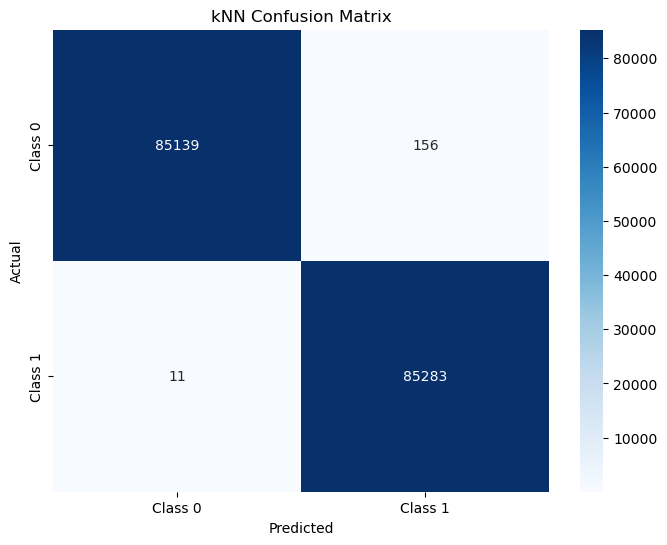

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
# Find the best confusion matrix
# conf_matrix = confusion_matrix(y_test, knn_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

num_neighbors = [1, 2, 3, 4, 5]
for k in num_neighbors:
    print(f"Confusion Matrix for Num_neighbors={k}:")
    print(confusion_matrix_dict[k])
    # Accuracy
    print("Accuracy: ", accuracy_dict[k])
    # F1 Score
    f_score = 2 * confusion_matrix_dict[k][1][1] / (2 * confusion_matrix_dict[k][1][1] + confusion_matrix_dict[k][1][0] + confusion_matrix_dict[k][0][1])
    print(f"F1 Score for k={k}: {f_score}")
    # False positive rate
    fpr = confusion_matrix_dict[k][0][1] / (confusion_matrix_dict[k][0][1] + confusion_matrix_dict[k][0][0])
    print(f"False Positive Rate for k={k}: {fpr}")
    # False negative rate
    fnr = confusion_matrix_dict[k][1][0] / (confusion_matrix_dict[k][1][0] + confusion_matrix_dict[k][1][1])
    print(f"False Negative Rate for k={k}: {fnr}")
    # precision
    precision = confusion_matrix_dict[k][1][1] / (confusion_matrix_dict[k][1][1] + confusion_matrix_dict[k][0][1])
    print(f"Precision for k={k}: {precision}")
    # True positive rate
    tpr = confusion_matrix_dict[k][1][1] / (confusion_matrix_dict[k][1][1] + confusion_matrix_dict[k][1][0])
    print(f"True Positive Rate for k={k}: {tpr}")
    print()





conf_matrix = confusion_matrix_dict[max(accuracy_dict, key=accuracy_dict.get)]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('kNN Confusion Matrix')
plt.show()